<a id='home'></a>
### purpose

look to see if the flip flop between interior varieties from the future offset is also apparent in the projection to the common garden for either GF or RONA

[1. load population data](#popdata)

[2. Gradient Forests](#gf)
- [plot interior vs cross-variety](#plotcomp)

[3. RONA](#rona)

In [1]:
from pythonimports import *
from myfigs import save_pdf

lview, dview = get_client()

figdir = makedir('/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/flip_flop')

latest_commit()
session_info.show()

43 43
##################################################################
Current commit of pythonimports:
commit 29355f0d2523f0764a8ef91a717e16299fc5c02d  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jul 15 13:22:04 2022 -0400
Today:	September 09, 2022 - 09:39:04
python version: 3.8.5
##################################################################



<a id='popdata'></a>
# 1. load population data

[top](#home)

In [2]:
envdata = {}
envdata['jp'] = pd.read_table('/data/projects/pool_seq/environemental_data/jp_rm_p24/jp_no-p24_std_env-19variables.txt')
envdata['jp'].index = envdata['jp']['our_id'].tolist()
envdata['jp'].head()

,id1,id2,our_id,LAT,LONG,Elevation,AHM,CMD,DD5,DD_0,EMT,EXT,Eref,FFP,MAP,MAT,MCMT,MSP,MWMT,NFFD,PAS,SHM,TD,bFFP,eFFP,group_color
JP_p98,9150251,38,JP_p98,54.3333,-106.6333,537,0.675175,0.520607,-0.903668,1.089738,-0.977280,-0.426821,-0.730607,-0.884497,-1.150172,-1.078601,-0.980098,-1.159142,-0.873067,0.024306,-0.875072,0.771358,0.796677,0.297097,-1.185008,green
JP_p73,3273,22,JP_p73,44.4200,-84.6800,359,0.836472,1.368359,1.495515,-1.369016,1.486357,0.679033,1.970275,1.047245,-0.089609,1.506884,1.449041,0.000330,1.202338,0.909053,-0.778393,0.304132,-1.205688,-0.729581,1.010494,blue
JP_p97,8060006,37,JP_p97,56.1167,-116.9167,636,1.138905,1.382488,-1.202248,0.719680,-0.625332,-0.368618,-0.448998,-1.781378,-1.263664,-0.914443,-0.919871,-1.584282,-1.651344,-0.670852,-0.839916,0.994352,0.436701,0.737103,-2.282760,green
JP_p60,3260,17,JP_p60,46.7200,-84.3900,203,-0.272448,-0.129337,0.093943,-0.869081,0.927381,-0.659632,0.101418,0.495318,0.364358,0.645056,0.907002,0.026096,-0.224503,0.466680,0.320236,-0.311756,-1.093195,0.150429,1.010494,blue
JP_p100,9040116,40,JP_p100,55.7667,-97.8167,205,-0.917638,-0.199983,-1.852100,2.404514,-1.743285,-0.135807,-1.831440,-2.333304,-0.974064,-2.350824,-1.943723,-1.030312,-1.456774,-2.693131,-0.330152,0.293514,1.674118,2.497123,-1.843659,green


In [3]:
# map prov ID to our ID to translate pop names in phenotype data below
envdata['combined'] = pd.read_table('/data/projects/pool_seq/environemental_data/change_p6/df_ALL-naturalpops_raw_env-19variables_change-p6.txt')
envdata['combined'].index = envdata['combined']['our_id'].tolist()
provdict = dict(zip(envdata['combined']['prov'], envdata['combined']['our_id']))
print(provdict)

{1: 'DF_p1', 2: 'DF_p2', 3: 'DF_p3', 4: 'DF_p4', 5: 'DF_p5', 6: 'DF_p6', 7: 'DF_p7', 8: 'DF_p8', 9: 'DF_p9', 10: 'DF_p10', 11: 'DF_p11', 12: 'DF_p12', 13: 'DF_p13', 14: 'DF_p14', 15: 'DF_p15', 16: 'DF_p16', 17: 'DF_p17', 18: 'DF_p18', 19: 'DF_p19', 20: 'DF_p20', 23: 'DF_p23', 24: 'DF_p24', 25: 'DF_p25', 26: 'DF_p26', 27: 'DF_p27', 28: 'DF_p28', 29: 'DF_p29', 30: 'DF_p30', 31: 'DF_p31', 32: 'DF_p32', 33: 'DF_p33', 34: 'DF_p34', 35: 'DF_p35', 36: 'DF_p36', 37: 'DF_p37', 38: 'DF_p38', 39: 'DF_p39', 40: 'DF_p40', 41: 'DF_p41', 42: 'DF_p42', 43: 'DF_p43', 44: 'DF_p44', 45: 'DF_p45', 46: 'DF_p46', 47: 'DF_p47', 48: 'DF_p48', 49: 'DF_p49', 50: 'DF_p50', 51: 'DF_p51', 52: 'DF_p52', 53: 'DF_p53', 54: 'DF_p54', 55: 'DF_p55', 56: 'DF_p56', 57: 'DF_p57', 58: 'DF_p58', 59: 'DF_p59', 60: 'DF_p60', 61: 'DF_p61', 62: 'DF_p62', 72: 'DF_p72', 73: 'DF_p73', 74: 'DF_p74', 75: 'DF_p75', 76: 'DF_p76', 77: 'DF_p77', 78: 'DF_p78', 79: 'DF_p79', 80: 'DF_p80', 81: 'DF_p81', 82: 'DF_p82', 83: 'DF_p83', 84: 'DF_p

In [4]:
# coastal
envdata['fdc'] = envdata['combined'][envdata['combined']['Variety']=='FDC'].copy()
nrow(envdata['fdc'])

38

In [5]:
# interior
envdata['fdi'] = envdata['combined'][envdata['combined']['Variety']=='FDI'].copy()
nrow(envdata['fdi'])

35

In [6]:
assert nrow(envdata['fdi']) + nrow(envdata['fdc']) == nrow(envdata['combined'])

In [7]:
# create color dict for pop colors
cdict = dict(zip(envdata['jp'].index,
                 envdata['jp']['group_color']))

df_colors = pd.read_table('/data/projects/pool_seq/environemental_data/change_p6/doug-fir_colored_pops.txt')
df_colors.loc[df_colors['our_id']=='DF_p40', ['group', 'group_color']] = 'North BC', '#f205f4'  # as in ../01_split_training_and_testing.ipynb

cdict.update(dict(
    zip(df_colors['our_id'],
        df_colors['group_color'])
))


assert len(cdict) == nrow(envdata['jp']) + nrow(envdata['combined'])

In [8]:
# from ../08_climate_and_geographic_distance_vs_phenotypes.ipynb#calc
# separate interior into two genetic groups seen in PCA
western_groups = ['North BC', 'South Central BC']

fdi_envdata = envdata['fdi'].copy()
group_dict = dict(zip(df_colors['our_id'], df_colors['group']))
fdi_envdata['group'] = fdi_envdata['our_id'].map(group_dict)
fdi_envdata['genetic_group'] = ['western' if group in western_groups else 'eastern' for group in fdi_envdata['group']]

fdi_groups = fdi_envdata[['our_id', 'genetic_group']].groupby('genetic_group')['our_id'].apply(list).to_dict()
print(fdi_groups)

{'eastern': ['DF_p3', 'DF_p5', 'DF_p18', 'DF_p19', 'DF_p20', 'DF_p33', 'DF_p34', 'DF_p37', 'DF_p46', 'DF_p47', 'DF_p54', 'DF_p55', 'DF_p56', 'DF_p57', 'DF_p58', 'DF_p59', 'DF_p60', 'DF_p61', 'DF_p62'], 'western': ['DF_p4', 'DF_p7', 'DF_p8', 'DF_p9', 'DF_p35', 'DF_p36', 'DF_p38', 'DF_p39', 'DF_p40', 'DF_p41', 'DF_p42', 'DF_p43', 'DF_p44', 'DF_p45', 'DF_p48', 'DF_p49']}


<a id='gf'></a>
# 2. Gradient Forests

[top](#home)

<a id='netcdf'></a>
### extract offset values from netCDF files
[top](#home)

In [9]:
def read_offset_file(offset_file, x_dim="latitude", y_dim="longitude"):
    """Read in netcdf file."""
    import xarray as xr
    import rioxarray

    ds = xr.open_dataset(offset_file)
    ds.rio.set_spatial_dims(x_dim=x_dim, y_dim=y_dim, inplace=True)
    ds.rio.write_crs("epsg:4326", inplace=True)
    
    layers = [var for var in list(ds.variables) if var not in ['crs', 'longitude', 'latitude']]
    assert len(layers) == 1
    layer = layers[0]
    vals = ds[layer][:,:]
    lons = ds[layer]['longitude']
    lats = ds[layer]['latitude']
    
    return ds, layer, vals, lons, lats
dview['read_offset_file'] = read_offset_file


def get_offset_data(offset_file, envdata, latcol='LAT', loncol='LONG'):
    """Read in offset data from netCDF `offset_file` for each of the pops in `envdata`."""
    import xarray as xr

    # read in offset data
    ds,layer,*args = read_offset_file(offset_file)

    # pull offset values directly from the shapefile
    target_lat = xr.DataArray(envdata[latcol], dims='points')
    target_lon = xr.DataArray(envdata[loncol], dims='points')
    offsets = ds[layer].sel(longitude=target_lon, latitude=target_lat, method='nearest').to_dataframe()
    offsets.index = envdata['our_id'].tolist()
    
    try:
        assert offsets[offsets.columns[-1]].isnull().sum() == 0
    except AssertionError as e:
        # there can be null vals if a population resides outside of the shapefile boundaries ...
        # ... when shapefiles have been used to clip climate data
        print(offset_file, envdata.index)
        raise e

    return offsets



In [10]:
# get the files that contain the offset information
fitting_dir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/fitting'
ncfiles = fs(fitting_dir, endswith='.nc', exclude=['NA_', '_wl-'])
len(ncfiles)

138

In [11]:
# for each of the netCDF files, partition into garden, species, dataset (wza/baypass/random), and whether ...
# ... it's one of the k-fold cross-validation sets or the full (no test set) dataset
# raw_offset[garden][spp][dataset][k_or_full] = f
raw_offset = wrap_defaultdict(None, 4)
species = []
for f in ncfiles:
    spp,method,setname,kfold,*args = op.basename(f).rstrip(".txt").split("-")
    kfold = kfold.split("_gradient")[0]
    garden = args[0].split("_")[0]
    dataset = '-'.join([method, setname])
    
    assert garden in ['vancouver', 'christine', 'fontbrune']
    assert spp in ['wl', 'jp', 'fdi', 'fdc', 'combined']
    assert kfold in ['full', 'k1', 'k2', 'k3', 'k4']
    
    species.append(spp)
    raw_offset[garden][spp][dataset][kfold] = f

for garden,sppdict in raw_offset.items():
    for spp,datadict in sppdict.items():
        for dataset,kdict in datadict.items():
            print(garden, spp, dataset, len(kdict), keys(kdict))

vancouver combined baypass-pseudo_random_loci 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver combined baypass-random 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver combined baypass-real 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver combined wza-pseudo_random_loci 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver combined wza-random 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver combined wza-real 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdc baypass-pseudo_random_loci 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdc baypass-random 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdc baypass-real 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdc wza-pseudo_random_loci 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdc wza-random 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdc wza-real 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdi baypass-pseudo_random_loci 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdi baypass-random 5 ['full', 'k1', 'k2', 'k3', 'k4']
vancouver fdi baypass-real 5 ['full', 'k1', 'k

In [12]:
# retrieve offset data in parallel
jobs = []
arg_order = []
for garden,sppdict in raw_offset.items():
    for spp,datadict in sppdict.items():
        latcol = 'LAT' #if spp != 'wl' else 'Latitude'
        loncol = 'LONG' #if spp != 'wl' else 'Longitude'
        for dataset,kdict in datadict.items():
            for kfold,f in kdict.items():
                arg_order.append([garden, spp, dataset, kfold, f])
                jobs.append(
                    lview.apply_async(
                        get_offset_data, *(f, envdata[spp]), **dict(latcol=latcol, loncol=loncol)
                    )
                )
watch_async(jobs)


Watching 138 jobs ...


100%|███████████████| 138/138 [00:00<00:00, 482344.96it/s]


In [13]:
# get job returns, store in dict
offsets = wrap_defaultdict(None, 4)
for i,job in enumerate(jobs):
    garden,spp,dataset,kfold,f = arg_order[i]
    df = job.r
    offsets[garden][spp][dataset][kfold] = df.copy()
df.head()

,crs,longitude,latitude,X..Downloads.NA_ENSEMBLE_rcp45_2050s.TD_WGS84_clipped_jp.tif
JP_p98,0,-106.627715,54.323131,0.064699
JP_p73,0,-84.675644,44.410801,0.045147
JP_p97,0,-116.914096,56.123248,0.063981
JP_p60,0,-84.395107,46.725237,0.024951
JP_p100,0,-97.814158,55.772576,0.082029


In [14]:
keys(offsets['vancouver']['combined'])

['baypass-pseudo_random_loci',
 'baypass-random',
 'baypass-real',
 'wza-pseudo_random_loci',
 'wza-random',
 'wza-real']

<a id='plotcomp'></a>
# plot interior vs cross-variety

[top](#home)

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/flip_flop/GF_fdi_crossvar_comp_at_vancouver.pdf


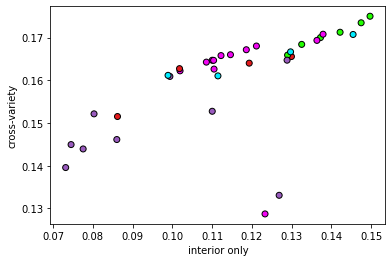

In [15]:
cross_vardf = offsets['vancouver']['combined']['wza-real']['full']
cross_var = cross_vardf[cross_vardf.columns[-1]]

int_vardf = offsets['vancouver']['fdi']['wza-real']['full']
int_var = int_vardf[int_vardf.columns[-1]]


fig, ax = plt.subplots()
plt.scatter(int_var, cross_var.loc[int_var.index], c=[cdict[pop] for pop in int_var.index], edgecolor='k')
plt.xlabel('interior only')
plt.ylabel('cross-variety')

save_pdf(op.join(figdir, 'GF_fdi_crossvar_comp_at_vancouver.pdf'))

In [16]:
int_var.corr(cross_var, method='spearman')

0.8100840336134455

In [17]:
files = [raw_offset['vancouver']['combined']['wza-real']['full'],
         raw_offset['vancouver']['fdi']['wza-real']['full']]

files

['/data/projects/pool_seq/phenotypic_data/offset_misc_files/fitting/combined-wza-real-full_gradient_forest_training_combined-vancouver_all-envs_WGS84_clipped_offset.nc',
 '/data/projects/pool_seq/phenotypic_data/offset_misc_files/fitting/fdi-wza-real-full_gradient_forest_training_interior-vancouver_all-envs_WGS84_clipped_offset.nc']

In [18]:
# clip cross-variety model to interior range and save

import geopandas, rioxarray, cartopy.crs, xarray
from shapely.geometry import box, mapping

# read in netcdf file
dataset = xarray.open_dataset(files[0])
# add metadata for WGS84
dataset.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
dataset.rio.write_crs("epsg:4326", inplace=True)

# read in the shapefile
shp = geopandas.read_file('/data/projects/pool_seq/environemental_data/shapefiles/interior_union_file.shp',
                          crs=cartopy.crs.PlateCarree())

# clip climate data within boundaries of shapefile
clipped = dataset.rio.clip(shp.geometry.apply(mapping), shp.crs, drop=False)

clipped_file = '/lu213/brandon.lind/data/testdir/combined-wza-real-full_gradient_forest_training_combined-vancouver_all-envs_WGS84_clipped_offset-to_fdi.nc'
clipped.to_netcdf(clipped_file)

files.append(clipped_file)

cross-variety model
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/flip_flop/GF_cross-variety_model_at_vancouver.pdf


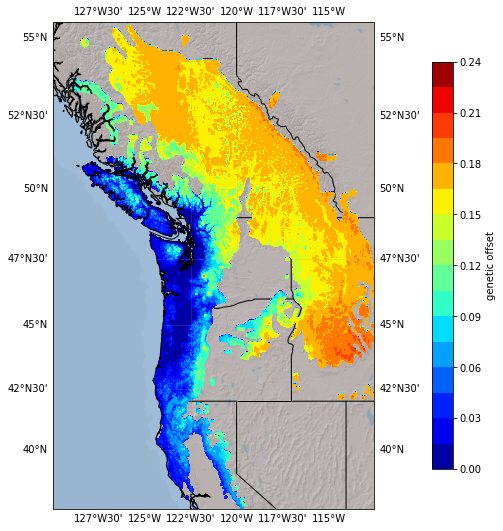

interior-only model
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/flip_flop/GF_interior-only_model_at_vancouver.pdf


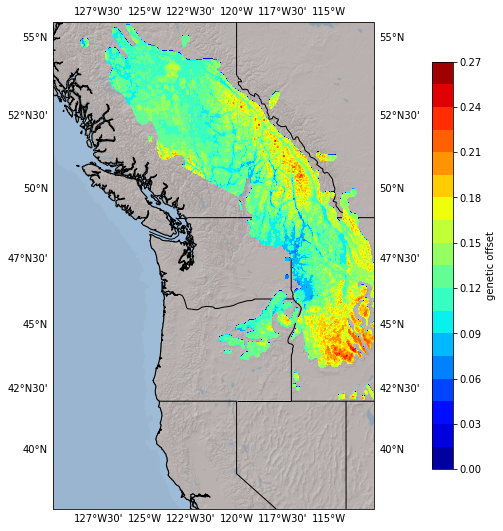

cross-variety model
Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/flip_flop/GF_cross-variety_model_at_vancouver.pdf


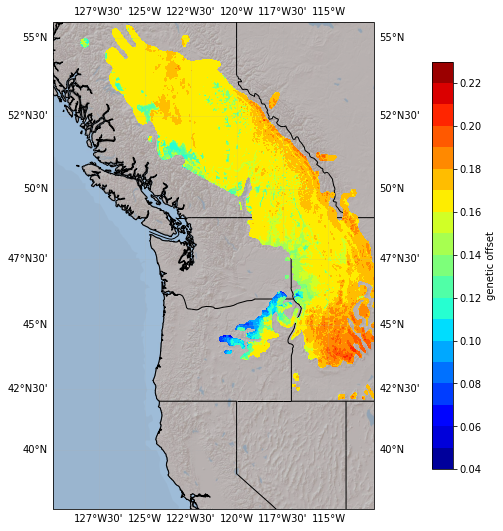

In [19]:
extent = {'jp': [-119.5, -58, 41, 60],
          'combined': [-130, -112.5, 37.5, 55.5],
          'fdc': [-130, -112.5, 37.5, 55.5],
          'fdi': [-130, -112.5, 37.5, 55.5]}

figsize = {'jp': (15, 10),
           'combined': (8, 15),
           'fdc': (8, 15),
           'fdi': (8, 15)}

ext = extent['combined']
size = figsize['combined']

for nc in files:
    model = 'cross-variety model' if op.basename(nc).startswith('combined') else 'interior-only model'
    print(ColorText(model).bold())
    
    # do the GIS
    ds, layer, vals, lons, lats = read_offset_file(nc)

    # fig
    ax = basemap(extent=ext, figsize=size)
    contours = plt.contourf(lons, lats, vals, 20, cmap='jet', transform=ccrs.PlateCarree(), origin='lower')
    cb = plt.colorbar(contours, pad=0.13, shrink=0.5)
    cb.set_label(f'genetic offset')
    
    model_name = model.replace(' ', '_')  # remove space
    save_pdf(op.join(figdir, f'GF_{model_name}_at_vancouver.pdf'))
    
    plt.show()
    plt.close()

<a id='rona'></a>
# 3. RONA

[top](#home)

In [20]:
ronadir = '/data/projects/pool_seq/phenotypic_data/offset_misc_files/results/rona'

rona = pklload(op.join(ronadir, 'rona.pkl'))

In [21]:
# gather RONA into something more useful
myrona = wrap_defaultdict(list, 2)  # muh muh muh myyyy pyRONA
for spp, envdict in rona.items():
    for env, rcpdict in envdict.items():
        rcp_dfs = []
        for rcp, popdict in rcpdict.items():
            ronadict = OrderedDict()
            for pop in popdict.keys():
                ronadict[pop] = popdict[pop]['wza']['real']
            rcp_dfs.append(
                pd.DataFrame(ronadict, index=[rcp]).T
            )
        myrona[spp][env] = pd.concat(rcp_dfs, axis=1)
        
myrona[spp][env].head()

,vancouver
DF_p1,0.120230
DF_p18,0.539900
DF_p19,0.573894
DF_p2,0.131694
DF_p20,0.599940


In [22]:
# load the environments calculated to be most different between current and common garden scenarios (t-test pvals)
pkl = op.join(ronadir, 'efdict.pkl')
canonical_efs = pklload(pkl)['canonical']

canonical_efs

defaultdict(dict,
            {'jp': {'christine': ['EXT', 'MSP', 'MAP', 'SHM', 'Elevation'],
              'fontbrune': ['EXT', 'MSP', 'SHM', 'AHM', 'MAP']},
             'combined': {'vancouver': ['bFFP', 'FFP', 'NFFD', 'eFFP', 'DD5']},
             'fdc': {'vancouver': ['bFFP', 'FFP', 'eFFP', 'NFFD', 'EMT']},
             'fdi': {'vancouver': ['bFFP', 'FFP', 'eFFP', 'NFFD', 'TD']}})

In [23]:
# load the environments calculated to be most different between current and future scenarios (t-test pvals)
# created in ../16_future_RONA.ipynb
future_pkl = op.join(ronadir, 'canonical_future_efdict.pkl')
future_canonical_efs = pklload(future_pkl)

future_canonical_efs

defaultdict(dict,
            {'jp': {'NA_ENSEMBLE_rcp45_2050s': ['MWMT',
               'MAT',
               'MCMT',
               'eFFP',
               'FFP'],
              'NA_ENSEMBLE_rcp45_2080s': ['MWMT',
               'MAT',
               'MCMT',
               'FFP',
               'eFFP'],
              'NA_ENSEMBLE_rcp85_2050s': ['MWMT',
               'MAT',
               'MCMT',
               'FFP',
               'eFFP'],
              'NA_ENSEMBLE_rcp85_2080s': ['MWMT',
               'FFP',
               'MAT',
               'bFFP',
               'eFFP']},
             'fdi': {'NA_ENSEMBLE_rcp45_2050s': ['EMT',
               'FFP',
               'eFFP',
               'MCMT',
               'bFFP'],
              'NA_ENSEMBLE_rcp45_2080s': ['FFP',
               'EMT',
               'eFFP',
               'MCMT',
               'bFFP'],
              'NA_ENSEMBLE_rcp85_2050s': ['eFFP',
               'EMT',
               'FFP',
               'MCMT',
     

In [24]:
myrona['fdi']['AHM']

,vancouver
DF_p18,0.069657
DF_p19,0.089342
DF_p20,0.106966
DF_p3,0.110273
DF_p33,0.065105
DF_p34,0.116242
DF_p35,0.177592
DF_p36,0.194111
DF_p37,0.112607
DF_p38,0.182922


In [25]:
canonical_efs['fdi']['vancouver']

['bFFP', 'FFP', 'eFFP', 'NFFD', 'TD']

<a id='comprona'></a>
### plot comparison

[top](#home)

Saved to:  /data/projects/pool_seq/phenotypic_data/offset_misc_files/results/flip_flop/RONA_fdi_crossvar_comp_at_vancouver.pdf


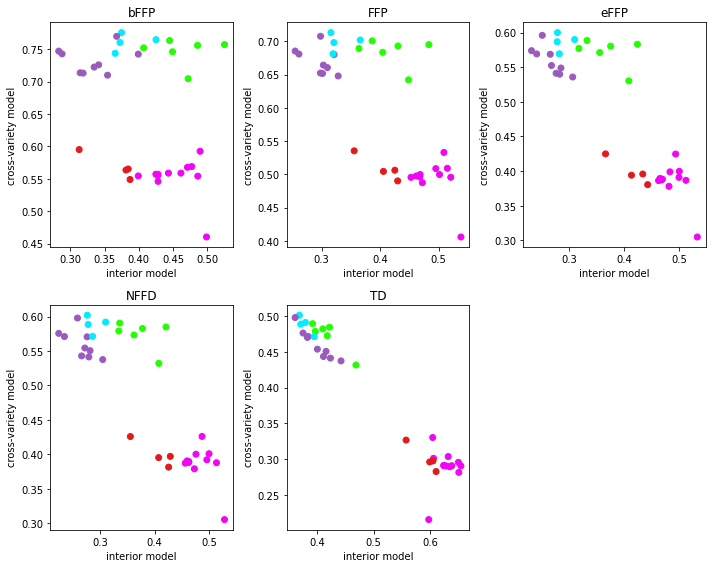

In [26]:
canonical_envs = canonical_efs['fdi']['vancouver']

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for i, env in enumerate(canonical_envs):
    ax = axes.flat[i]
    
    fdi_model = myrona['fdi'][env].copy()
    ax.scatter(fdi_model['vancouver'].tolist(),
                myrona['combined'][env].loc[fdi_model.index, 'vancouver'],
                c=fdi_model.index.map(cdict)
               )
    ax.set_title(env)
    ax.set_xlabel('interior model')
    ax.set_ylabel('cross-variety model')
    
axes.flat[-1].remove()
    
plt.tight_layout()

save_pdf(op.join(figdir, 'RONA_fdi_crossvar_comp_at_vancouver.pdf'))

plt.show()
plt.close()

[top](#home)